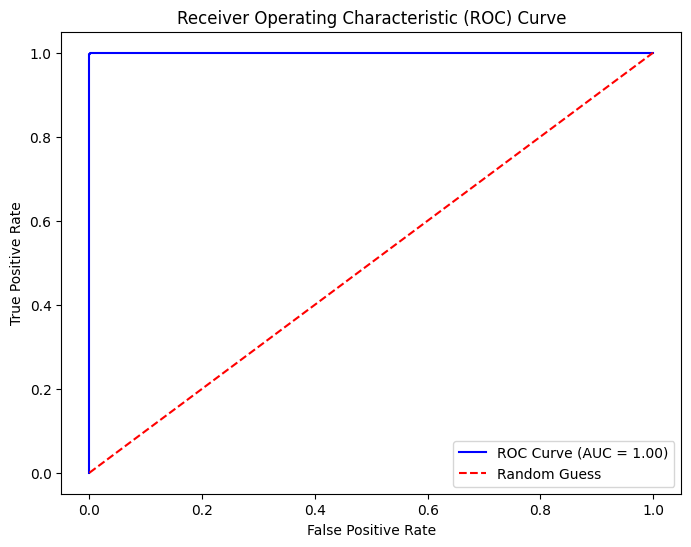

C:\Users\Vraj\AppData\Local\Temp\ipykernel_12100\1583996106.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_proba[y_test == 1], label='Placed', color='green', shade=True)
C:\Users\Vraj\AppData\Local\Temp\ipykernel_12100\1583996106.py:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_proba[y_test == 0], label='Not Placed', color='red', shade=True)


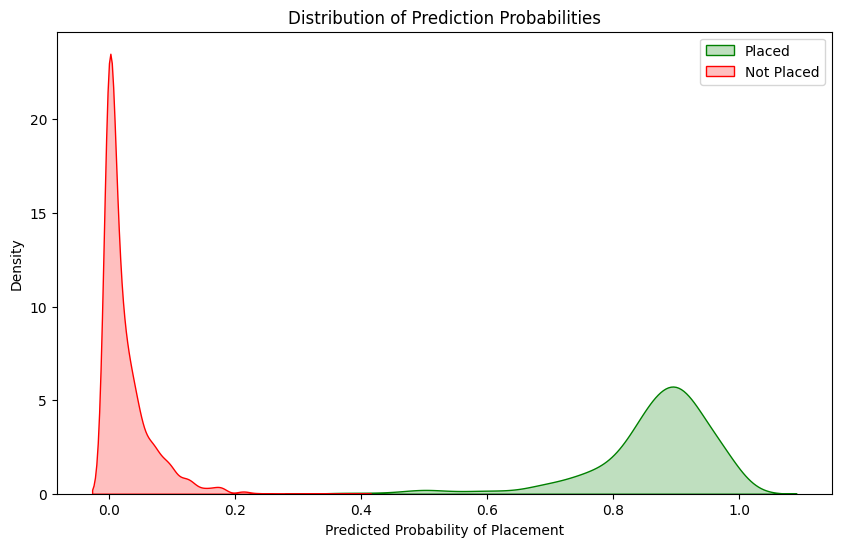


--- Student Placement Prediction ---
Enter student details (or type 'exit' to quit)

Invalid input. Please enter the data in the correct format.



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Data Loading and Preprocessing ---
df = pd.read_csv('college_student_placement_dataset.csv')

# Encode target and features
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})
y = df['Placement']
X = df.drop(columns=['Placement'])
X = pd.get_dummies(X, drop_first=True) # Handles 'Gender'

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- 2. Train the Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# --- 3. Better Visualizations ---

# a) ROC Curve and AUC Score
# Get prediction probabilities for the 'Placed' class (1)
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# b) Prediction Probability Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_proba[y_test == 1], label='Placed', color='green', shade=True)
sns.kdeplot(y_pred_proba[y_test == 0], label='Not Placed', color='red', shade=True)
plt.title('Distribution of Prediction Probabilities')
plt.xlabel('Predicted Probability of Placement')
plt.ylabel('Density')
plt.legend()
plt.show()


# --- 4. Dynamic Prediction Function ---
def predict_placement():
    """Interactively prompts user for student data and predicts placement."""
    print("\n--- Student Placement Prediction ---")
    print("Enter student details (or type 'exit' to quit)")
    
    while True:
        try:
            iq = input("Enter IQ: ")
            if iq.lower() == 'exit': break
            
            cgpa = float(input("Enter CGPA: "))
            skills = int(input("Enter Communication Skills (1-10): "))
            gender = input("Enter Gender (Male/Female): ").strip().title()
            
            # Create a DataFrame for the new student
            gender_male = 1 if gender == 'Male' else 0
            new_student_data = pd.DataFrame([[int(iq), cgpa, skills, gender_male]], 
                                            columns=['IQ', 'CGPA', 'Communication_Skills', 'Gender_Male'])
            
            # Predict probability and outcome
            prob = model.predict_proba(new_student_data)[0][1] # Probability of being placed
            prediction = model.predict(new_student_data)[0]
            
            result = "Placed" if prediction == 1 else "Not Placed"
            
            print(f"\nPrediction: **{result}**")
            print(f"Confidence (Probability of Placement): {prob:.2%}\n")
            print("-" * 30)

        except (ValueError, KeyError):
            print("\nInvalid input. Please enter the data in the correct format.\n")
        except Exception as e:
            print(f"An error occurred: {e}")
            break

# Run the dynamic prediction function
predict_placement()

